In [1]:
import matplotlib.pyplot as plt 
from astropy import units as u
from astropy.io import fits
import numpy as np 
from reproject import reproject_interp
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import simple_norm

In [2]:
directory = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/"
cube='S2349+2904_HIcube2_clean_smooth_image_5_cube_kms.fits'
mask='S2349+2904_HIcube2_clean_smooth_image_5_mask_kms.fits'

In [3]:
# import data of BBarolo model 
# get the header 
header = fits.getheader(directory+cube)
#data moment0
data_mom0 = fits.getdata(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
header_mom0 = fits.getheader(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
#data moment1
data_mom1 = fits.getdata(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
#data moment2
data_mom2 = fits.getdata(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_2mom.fits")
#data model
data_model = fits.getdata(directory+"output3/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")
#moment 0 of the model
data_model_mom0 = fits.getdata(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_0mom_azim.fits")
#moment 1 of the model
data_model_mom1 = fits.getdata(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_1mom_azim.fits")
#moment 2 of the model 
data_model_mom2 = fits.getdata(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_2mom_azim.fits")

In [4]:
# upload the optical image 
optical_file = "ngc7753-optical.fits"
header_optical  = fits.getheader(directory+optical_file)
data_optical = fits.getdata(directory+optical_file)

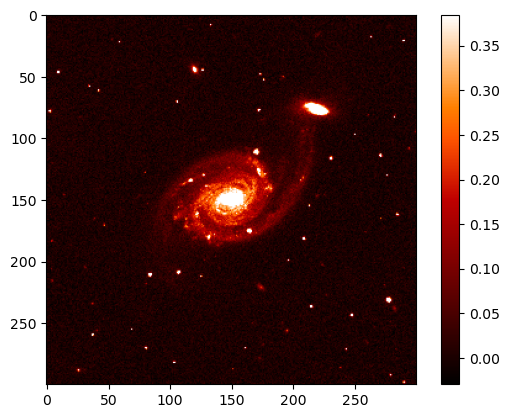

In [5]:
vmin, vmax = np.percentile(data_optical, [1, 99.5])
plt.imshow(data_optical, cmap='gist_heat', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.show()

### Reproject the HI image into the same pixel grid as the optical image

In [6]:
def calc_rms(x):
    rms = np.sqrt(np.nanmean(x**2))
    return rms

In [7]:
hdul_mom0 = fits.open(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
hi_reprojected_0,footprint = reproject_interp(hdul_mom0,header_optical)
rms_mom0 = np.sqrt(np.nanmean(hi_reprojected_0**2))

In [8]:
print(rms_mom0)
print(np.nanmax(hi_reprojected_0))

0.4718670833172599
1.4476169347763062


In [9]:
WCS(header_mom0)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 357.24920654 29.07100296 
CRPIX : -202.5 -191.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0016666670563 0.0016666670563 
NAXIS : 107  104

In [10]:
np.linspace(2 * rms_mom0, np.nanmax(hi_reprojected_0), 13)

array([0.94373417, 0.9857244 , 1.02771463, 1.06970486, 1.11169509,
       1.15368532, 1.19567555, 1.23766578, 1.27965601, 1.32164624,
       1.36363647, 1.4056267 , 1.44761693])

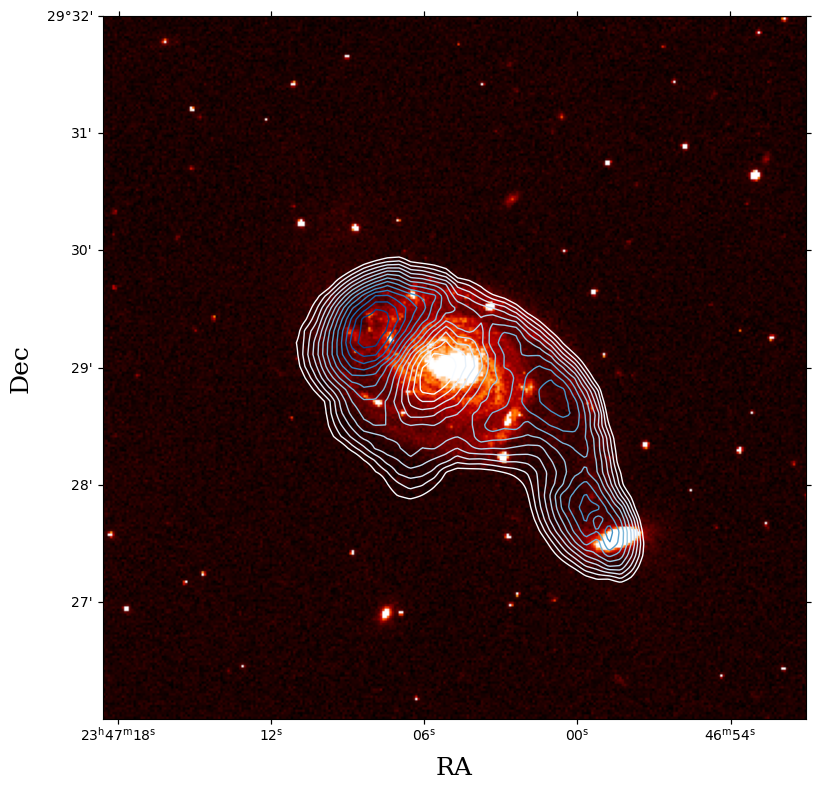

In [11]:

fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Background: Optical image
cb = ax.imshow(
    data_optical,
    cmap='gist_heat',  
    origin='lower',
    vmin=vmin, vmax=vmax,
)


levels = np.linspace(1.5 * rms_mom0, np.nanmax(hi_reprojected_0), 14)
ax.contour(
    hi_reprojected_0,
    levels=levels,
    cmap='Blues', 
    linewidths=1,
)

ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.tight_layout()
plt.show()

In [12]:
# compute the reprojection for moment 1 
hdulmom1 = fits.open(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
hi_mom1_rep, foot_mom1=reproject_interp(hdulmom1,header_optical)
rms_mom1=(np.sqrt(np.nanmean(hi_mom1_rep**2)))

In [13]:
print(np.nanmin(hi_mom1_rep),np.nanmax(hi_mom1_rep))
print(rms_mom1)

4750.0693359375 5659.49365234375
5077.334475555281


In [14]:
np.arange(np.nanmin(hi_mom1_rep), np.nanmax(hi_mom1_rep), 20)

array([4750.06933594, 4770.06933594, 4790.06933594, 4810.06933594,
       4830.06933594, 4850.06933594, 4870.06933594, 4890.06933594,
       4910.06933594, 4930.06933594, 4950.06933594, 4970.06933594,
       4990.06933594, 5010.06933594, 5030.06933594, 5050.06933594,
       5070.06933594, 5090.06933594, 5110.06933594, 5130.06933594,
       5150.06933594, 5170.06933594, 5190.06933594, 5210.06933594,
       5230.06933594, 5250.06933594, 5270.06933594, 5290.06933594,
       5310.06933594, 5330.06933594, 5350.06933594, 5370.06933594,
       5390.06933594, 5410.06933594, 5430.06933594, 5450.06933594,
       5470.06933594, 5490.06933594, 5510.06933594, 5530.06933594,
       5550.06933594, 5570.06933594, 5590.06933594, 5610.06933594,
       5630.06933594, 5650.06933594])

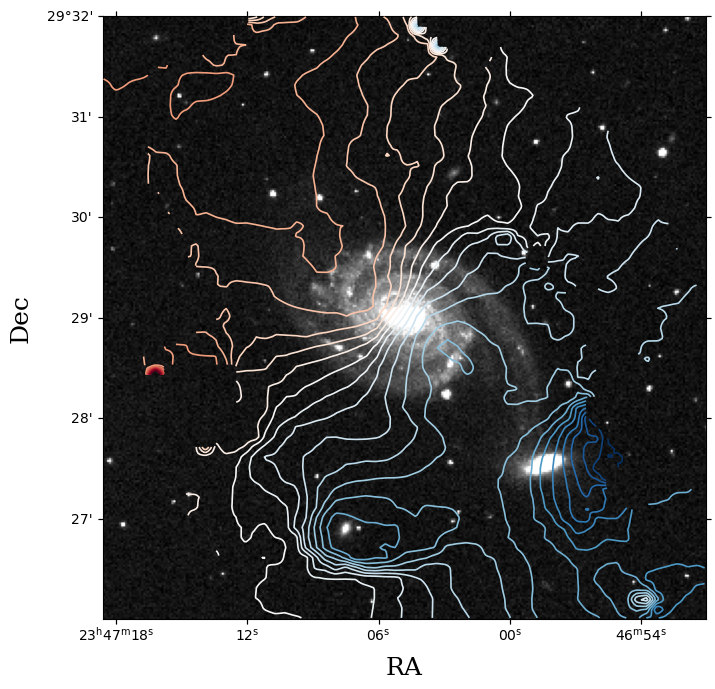

In [15]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Use log stretch for better contrast in faint structures
norm = simple_norm(data_optical, 'log', percent=99.5)
ax.imshow(data_optical, cmap='gist_gray', vmin=vmin,vmax=vmax, origin='lower')

# Velocity field (moment 1) contours: reversed RdBu, centered around systemic velocity
# Adjust levels if needed based on your specific velocity range
vel_min, vel_max = np.nanmin(hi_mom1_rep), np.nanmax(hi_mom1_rep)  
levels = np.arange(vel_min, vel_max-200, 25)
cont = ax.contour(hi_mom1_rep, levels=levels, cmap='RdBu_r', linewidths=1.2)

# Add a colorbar for the moment 1 contours (velocity field)
# label the contour, this is optional
#ax.clabel(cont, inline=True, fmt='%d km/s', fontsize=10)

ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# save figure 
# plt.savefig('velocity_overlay.svg', dpi=300)

plt.tight_layout()
plt.show()

In [16]:
hdulmom2 = fits.open(directory+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_2mom.fits")
hi_mom2_rep, foot_mom2=reproject_interp(hdulmom2,header_optical)
rms_mom2=(np.sqrt(np.nanmean(hi_mom2_rep**2)))

In [17]:
print(rms_mom2)
print(np.nanmin(hi_mom2_rep),np.nanmax(hi_mom2_rep))

36.70063282397652
8.333605364896357e-06 112.8647232055664


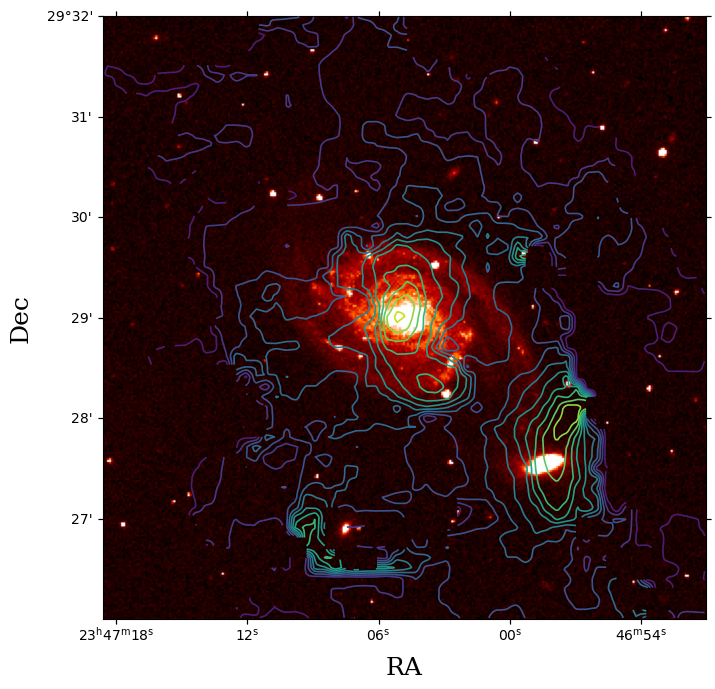

In [18]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Improve optical background contrast
norm = simple_norm(data_optical, 'log', percent=99.5)
ax.imshow(data_optical, cmap='gist_heat', vmin=vmin,vmax=vmax, origin='lower')

# Contours for moment 2 (velocity dispersion)
disp_min, disp_max = 0, 113  # in km/s (check your units)
levels = np.arange(disp_min, disp_max + 10, 10)
cont = ax.contour(hi_mom2_rep, levels=levels, cmap='viridis', linewidths=1.2)

# Label the contours
#ax.clabel(cont, inline=True, fmt='%d km/s', fontsize=10)

# Axis formatting
ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.savefig('moment2_overlay.svg', dpi=300)

plt.tight_layout()
plt.show()

### Residuals

In [19]:
residual_mom0 = data_mom0 -data_model_mom0
residual_mom1 = data_mom1 -data_model_mom1
residual_mom2 = data_mom2 -data_model_mom2

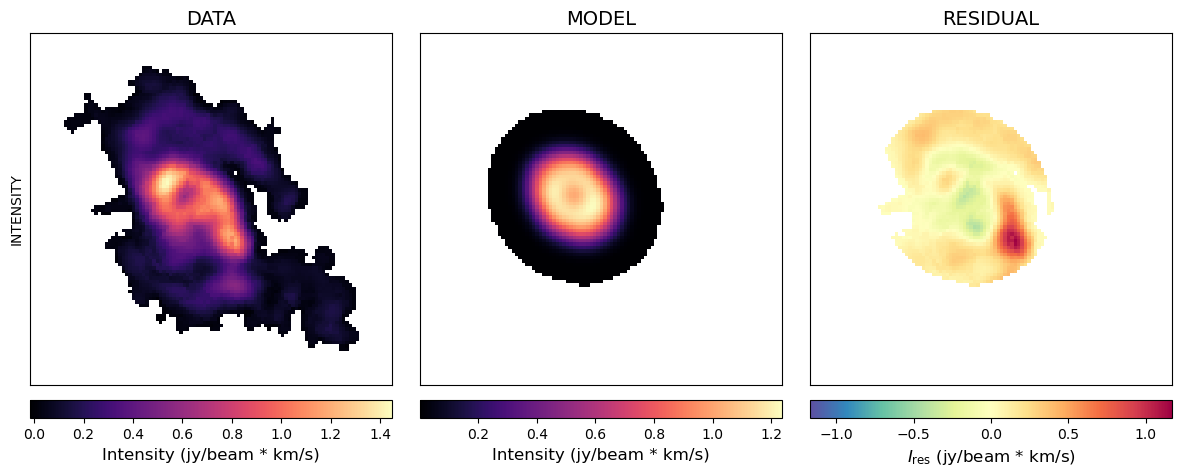

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})  # tighter spacing

# Common image kwargs
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: DATA ----------
im1 = axs[0].imshow(data_mom0, cmap='magma', **common_kwargs)
axs[0].set_title('DATA', fontsize=14)
axs[0].set_ylabel('INTENSITY')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Add shared colorbar below first two panels
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Intensity (jy/beam * km/s)', fontsize=12)

# ---------- Panel 2: MODEL ----------
im2 = axs[1].imshow(data_model_mom0, cmap='magma', **common_kwargs)
axs[1].set_title('MODEL', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Share colorbar with first panel
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Intensity (jy/beam * km/s)', fontsize=12)

# ---------- Panel 3: RESIDUAL ----------
resid_abs_max = np.nanmax(np.abs(residual_mom0))
im3 = axs[2].imshow(residual_mom0, cmap='Spectral_r', vmin=-resid_abs_max, vmax=resid_abs_max, **common_kwargs)
axs[2].set_title('RESIDUAL', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Separate colorbar for residuals
divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')   
cbar3.set_label(r'$I_{\mathrm{res}}$ (jy/beam * km/s)', fontsize=12)

# Equal aspect ratio for all panels
for ax in axs:
    ax.set_aspect('equal')

# Optional export
plt.savefig("moment0_panels_fixed.jpg", dpi=300, bbox_inches='tight')
# plt.savefig("moment0_model.eps",format="eps", dpi=300, bbox_inches='tight')
plt.show()


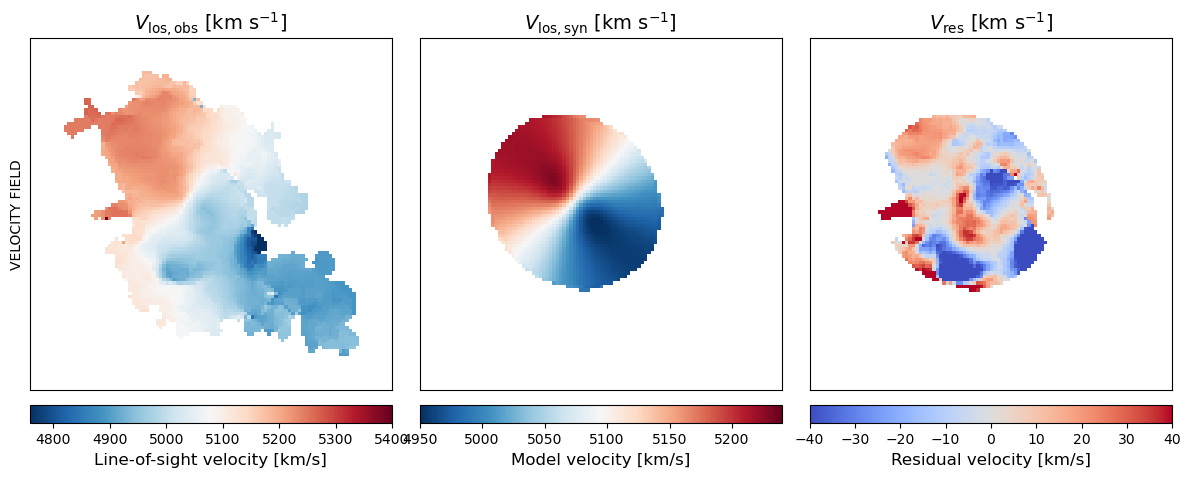

In [21]:
# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})

# Shared image display settings
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: Observed velocity ----------
im1 = axs[0].imshow(data_mom1, cmap='RdBu_r', vmin=4757.7983, vmax=5400, **common_kwargs)
axs[0].set_title(r'$V_{\mathrm{los,obs}}$ [km s$^{-1}$]', fontsize=14)
axs[0].set_ylabel('VELOCITY FIELD')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Line-of-sight velocity [km/s]', fontsize=12)

# ---------- Panel 2: Model velocity ----------
im2 = axs[1].imshow(data_model_mom1, cmap='RdBu_r', vmin=4950, vmax=5240, **common_kwargs)
axs[1].set_title(r'$V_{\mathrm{los,syn}}$ [km s$^{-1}$]', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Model velocity [km/s]', fontsize=12)

# ---------- Panel 3: Residual velocity ----------
resid_vlim = 40  # km/s
im3 = axs[2].imshow(residual_mom1, cmap='coolwarm', vmin=-resid_vlim, vmax=resid_vlim, **common_kwargs)
axs[2].set_title(r'$V_{\mathrm{res}}$ [km s$^{-1}$]', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')
cbar3.set_label(r'Residual velocity [km/s]', fontsize=12)

# Format all panels
for ax in axs:
    ax.set_aspect('equal')

# Optional: Export as publication-quality PDF
plt.savefig("moment1-model-ngc7753.png", dpi=300, bbox_inches='tight')
plt.show()

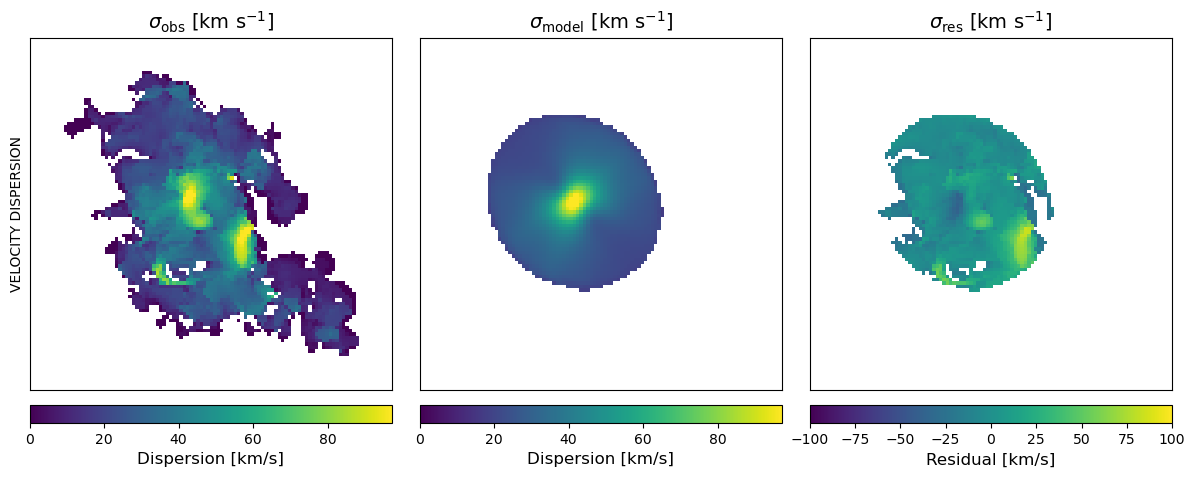

In [22]:

# Create figure and axes with tight spacing
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})

# Shared display settings
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: Observed dispersion ----------
vmin_m2 = 0
vmax_m2 = np.nanpercentile(data_mom2, 99.5)
im1 = axs[0].imshow(data_mom2, cmap='viridis', vmin=vmin_m2, vmax=vmax_m2, **common_kwargs)
axs[0].set_title(r'$\sigma_{\mathrm{obs}}$ [km s$^{-1}$]', fontsize=14)
axs[0].set_ylabel('VELOCITY DISPERSION')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Dispersion [km/s]', fontsize=12)

# ---------- Panel 2: Model dispersion ----------
im2 = axs[1].imshow(data_model_mom2, cmap='viridis', vmin=vmin_m2, vmax=vmax_m2, **common_kwargs)
axs[1].set_title(r'$\sigma_{\mathrm{model}}$ [km s$^{-1}$]', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Dispersion [km/s]', fontsize=12)

# ---------- Panel 3: Residual dispersion ----------
resid_lim = 100  # km/s
im3 = axs[2].imshow(residual_mom2, cmap='viridis', vmin=-resid_lim, vmax=resid_lim, **common_kwargs)
axs[2].set_title(r'$\sigma_{\mathrm{res}}$ [km s$^{-1}$]', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')
cbar3.set_label('Residual [km/s]', fontsize=12)

# Consistent appearance
for ax in axs:
    ax.set_aspect('equal')

# Optional: Export figure
# plt.savefig("moment2_threepanel_dispersion.pdf", dpi=300, bbox_inches='tight')
plt.show()


## Residual of the gas

In [23]:
data=fits.getdata(directory+cube)
data_new_galaxy = data - data_model

In [24]:
mom0_dat_new = np.nansum(data_new_galaxy,axis=0)*abs(header['CDELT3'])/1000

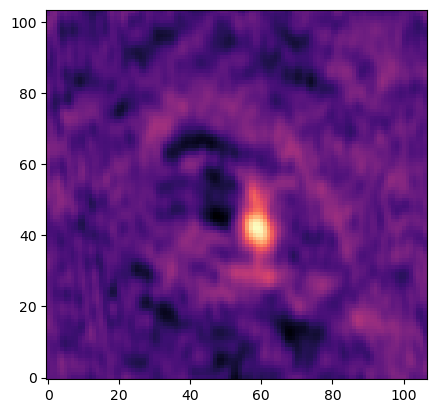

In [25]:
plt.imshow(mom0_dat_new, cmap='magma', origin='lower')

In [57]:
directory_new = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7752/"
hdul_new = fits.PrimaryHDU(data_new_galaxy,header=header)
hdul_new.writeto(directory_new + 'ngc7752_cube.fits', overwrite=True)